In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import tensorflow as tf 

In [4]:
archived_datasets = os.listdir('archive')
df_list = [pd.read_csv('archive/'+i) for i in archived_datasets]

/tmp/ipykernel_22671/3726685069.py:2: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv('archive/'+i) for i in archived_datasets]


In [5]:

def countofvalpercol():
    l = []
    for csv in df_list:
        for cols in csv:
            l.append([cols,len(csv[cols].value_counts().keys())])
            # print("{} - {}".format(
            #     cols,
            #     len(csv[cols].value_counts().keys())))
    return l
# sorted(countofvalpercol())
np.median([i[1] for i in countofvalpercol()])
    

285.0

In [6]:
def make_a_list_of_columns_from_archived():
    df = pd.DataFrame(columns=['name','label','sample'])
    for csv in df_list:
        for columns in csv.columns:
            # csv[str(columns)].value_counts().max()
            df.loc[len(df)] = [columns,"", list(csv[str(columns)].value_counts().keys())[:285]]
    return df

make_a_list_of_columns_from_archived()
# .to_csv('models/unitable-model/unitable_classify_dataset-v2.csv')

,name,label,sample
0,invoice_and_item_number,,"[INV-37974400176, INV-33826500031, INV-3612470..."
1,date,,"[2020-12-22, 2020-12-29, 2021-11-16, 2021-11-2..."
2,store_number,,"[2633, 4829, 2190, 2572, 2647, 3773, 4988, 266..."
3,store_name,,"[Hy-Vee #3 / BDI / Des Moines, Central City 2,..."
4,address,,"[3221 SE 14th St, 1501 Michigan Ave, 1460 2ND ..."
...,...,...,...
128,locale_name,,"[Ecuador, Riobamba, Guayaquil, Guaranda, Latac..."
129,description,,"[Carnaval, Viernes Santo, Fundacion de Cuenca,..."
130,transferred,,"[False, True]"
131,dcoilwtico,,"[64.07791222, 107.04, 59.59, 95.25, 46.21, 51...."


In [7]:
classify_dataset = pd.read_csv(
    'models/unitable-model/unitable_classify_dataset-v2.csv',
    usecols=['name','label', 'sample'],
)
classify_dataset.fillna(value='',inplace=True)
classify_dataset

,name,label,sample
0,invoice_and_item_number,,"['INV-37974400176', 'INV-33826500031', 'INV-36..."
1,date,date,"['2020-12-22', '2020-12-29', '2021-11-16', '20..."
2,store_number,,"[2633, 4829, 2190, 2572, 2647, 3773, 4988, 266..."
3,store_name,,"['Hy-Vee #3 / BDI / Des Moines', 'Central City..."
4,address,,"['3221 SE 14th St', '1501 Michigan Ave', '1460..."
...,...,...,...
169,Bracket,,
170,Sort,,
171,product name,name,"['Titos Handmade Vodka', 'Black Velvet', 'Fire..."
172,name,name,"['Titos Handmade Vodka', 'Black Velvet', 'Fire..."


In [8]:
label2nums= list(set(classify_dataset['label']))
label2nums = sorted(label2nums)
label2nums

['', 'Expiration date', 'category', 'date', 'name', 'price', 'sales', 'sold']

In [9]:
classify_dataset['labels_numeric'] = [label2nums.index(i) for i in classify_dataset['label']]
classify_dataset[100:]

,name,label,sample,labels_numeric
100,Variable,,['Gross domestic product (GDP) by state: All i...,0
101,Industry,,"['All industry total', 'Information', 'Educati...",0
102,Value,,"[0.0, 121.2, 741.8, 616.7, 588.2, 15.8, 740.5,...",0
103,Variable Unit,,"['Millions of current dollars', 'Millions of c...",0
104,Period Type,,"['annual', 'quarter']",0
...,...,...,...,...
169,Bracket,,,0
170,Sort,,,0
171,product name,name,"['Titos Handmade Vodka', 'Black Velvet', 'Fire...",4
172,name,name,"['Titos Handmade Vodka', 'Black Velvet', 'Fire...",4


In [10]:
classify_dataset['label'].value_counts()

label
                   127
category            12
price               10
sales                8
date                 6
Expiration date      5
name                 4
sold                 2
Name: count, dtype: int64

In [11]:
# zeroscols = classify_dataset[classify_dataset['labels_numeric'] == 0]
# classify_dataset = classify_dataset.drop(zeroscols.index[:89])
# drop 50 rows of zero results

In [12]:
classify_dataset['labels_numeric'].value_counts()

labels_numeric
0    127
2     12
5     10
6      8
3      6
1      5
4      4
7      2
Name: count, dtype: int64

In [13]:
classify_dataset.reset_index(inplace=True,drop=True)

In [14]:
classify_dataset[:50]

,name,label,sample,labels_numeric
0,invoice_and_item_number,,"['INV-37974400176', 'INV-33826500031', 'INV-36...",0
1,date,date,"['2020-12-22', '2020-12-29', '2021-11-16', '20...",3
2,store_number,,"[2633, 4829, 2190, 2572, 2647, 3773, 4988, 266...",0
3,store_name,,"['Hy-Vee #3 / BDI / Des Moines', 'Central City...",0
4,address,,"['3221 SE 14th St', '1501 Michigan Ave', '1460...",0
5,city,,"['Des Moines', 'Cedar Rapids', 'Davenport', 'W...",0
6,zip_code,,"[50010.0, 50613.0, 52402.0, 50317.0, 50265.0, ...",0
7,store_location,,"['POINT (-93.596754 41.554101)', 'POINT (-93.6...",0
8,county_number,,"[77.0, 57.0, 82.0, 7.0, 52.0, 97.0, 78.0, 85.0...",0
9,county,,"['POLK', 'LINN', 'SCOTT', 'BLACK HAWK', 'JOHNS...",0


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
from nltk.corpus import stopwords
from itertools import chain

name_tokenized = classify_dataset['name'].apply(
                lambda x : nltk.word_tokenize(x.lower().replace('_', ' ').replace('-',' '))
            ).tolist()

stopwords_list = list(stopwords.words('english'))

vectorizer = CountVectorizer()
name_tokenized = [list(filter(lambda x : x not in stopwords_list , item) )for item in name_tokenized]
name_tokenizedjoined = [' '.join(i) for i in name_tokenized]
keysvec = sorted(list(set(chain.from_iterable(name_tokenized))))
keysvec
vectorizer.fit(keysvec)
ohe = pd.get_dummies(vectorizer.vocabulary_,dtype=int)
ohe

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
len(vectorizer.vocabulary_),classify_dataset.shape

(136, (174, 4))

In [17]:
vectorizer.vocabulary_

{'address': 0,
 'adult': 1,
 'amount': 2,
 'asses': 3,
 'assessed': 4,
 'assessor': 5,
 'average': 6,
 'base': 7,
 'begin': 8,
 'best': 9,
 'bottle': 10,
 'bottles': 11,
 'bracket': 12,
 'brand': 13,
 'budget': 14,
 'category': 15,
 'charge': 16,
 'city': 17,
 'class': 18,
 'classification': 19,
 'clientele': 20,
 'cluster': 21,
 'code': 22,
 'cost': 23,
 'count': 24,
 'county': 25,
 'credential': 26,
 'ct': 27,
 'customer': 28,
 'date': 29,
 'dcoilwtico': 30,
 'description': 31,
 'division': 32,
 'dollars': 33,
 'earnings': 34,
 'effective': 35,
 'end': 36,
 'ending': 37,
 'expense': 38,
 'expiration': 39,
 'expiry': 40,
 'family': 41,
 'fee': 42,
 'gallons': 43,
 'genre': 44,
 'group': 45,
 'housi': 46,
 'id': 47,
 'income': 48,
 'industry': 49,
 'inventory': 50,
 'invoice': 51,
 'item': 52,
 'kind': 53,
 'label': 54,
 'life': 55,
 'list': 56,
 'liters': 57,
 'locale': 58,
 'location': 59,
 'marijuana': 60,
 'marke': 61,
 'market': 62,
 'medical': 63,
 'merchandising': 64,
 'ml': 65,

In [18]:
classify_dataset['tokenized'] = name_tokenized
classify_dataset['joinedstr'] = name_tokenizedjoined
classify_dataset.sort_values('joinedstr', inplace=True)
classify_dataset[:50]
classify_dataset.shape

for wordtoken in vectorizer.vocabulary_:
    l = [1 if wordtoken in row else 0 for row in classify_dataset['tokenized']]
    num = vectorizer.vocabulary_[wordtoken]
    classify_dataset['{}'.format(num)] = l

# run once, or else reinitialize the table again

/tmp/ipykernel_22671/554869226.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  classify_dataset['{}'.format(num)] = l
/tmp/ipykernel_22671/554869226.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  classify_dataset['{}'.format(num)] = l
/tmp/ipykernel_22671/554869226.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use

In [19]:
classify_dataset


,name,label,sample,labels_numeric,tokenized,joinedstr,0,1,2,3,...,126,127,128,129,130,131,132,133,134,135
85,Y,,"[6993095.91822916, 6993292.90104167, 6992966.0...",0,[],,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,Address,,"['MULTI ADDRESSES', '8 SOUTH RD', '51 OLD SPRI...",0,[address],address,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,address,,"['3221 SE 14th St', '1501 Michigan Ave', '1460...",0,[address],address,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,Address,,"['2833 S PADRE ISLAND DR', '4207 BELLMEAD DR',...",0,[address],address,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,Adult-Use Average Product Price,,"[44.56, 40.11, 44.25, 39.85, 39.49, 38.85, 39....",0,"[adult, use, average, product, price]",adult use average product price,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,YEAR,,"[2019, 2017, 2020, 2018]",0,[year],year,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39,Year,,"[2002, 2003, 2022, 2021, 2020, 2019, 2018, 201...",0,[year],year,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30,Zip,,"[77084, 77036, 77449, 78666, 77015, 77494, 752...",0,[zip],zip,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,zip_code,,"[50010.0, 50613.0, 52402.0, 50317.0, 50265.0, ...",0,"[zip, code]",zip code,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
classify_dataset['array_labels_numeric'] = [
 [1 if row == i else 0 for i in range(8)] for row in classify_dataset['labels_numeric']
]

/tmp/ipykernel_22671/1172838033.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  classify_dataset['array_labels_numeric'] = [


In [21]:
# for i in range(classify_dataset.shape[0]):
#     if classify_dataset.loc[i]['labels_numeric'] == 0:
#         classify_dataset.drop(index=i, inplace=True)

In [22]:
classify_dataset

,name,label,sample,labels_numeric,tokenized,joinedstr,0,1,2,3,...,127,128,129,130,131,132,133,134,135,array_labels_numeric
85,Y,,"[6993095.91822916, 6993292.90104167, 6992966.0...",0,[],,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
74,Address,,"['MULTI ADDRESSES', '8 SOUTH RD', '51 OLD SPRI...",0,[address],address,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
4,address,,"['3221 SE 14th St', '1501 Michigan Ave', '1460...",0,[address],address,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
27,Address,,"['2833 S PADRE ISLAND DR', '4207 BELLMEAD DR',...",0,[address],address,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
68,Adult-Use Average Product Price,,"[44.56, 40.11, 44.25, 39.85, 39.49, 38.85, 39....",0,"[adult, use, average, product, price]",adult use average product price,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,YEAR,,"[2019, 2017, 2020, 2018]",0,[year],year,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
39,Year,,"[2002, 2003, 2022, 2021, 2020, 2019, 2018, 201...",0,[year],year,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
30,Zip,,"[77084, 77036, 77449, 78666, 77015, 77494, 752...",0,[zip],zip,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"[1, 0, 0, 0, 0, 0, 0, 0]"
6,zip_code,,"[50010.0, 50613.0, 52402.0, 50317.0, 50265.0, ...",0,"[zip, code]",zip code,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"[1, 0, 0, 0, 0, 0, 0, 0]"


In [23]:
classify_dataset_label_array = pd.DataFrame(
    columns=[str(i) for i in range(8)]
)
for i in classify_dataset['array_labels_numeric']:
    classify_dataset_label_array.loc[len(classify_dataset_label_array)] = i 

In [24]:
classify_dataset_label_array

,0,1,2,3,4,5,6,7
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
169,1,0,0,0,0,0,0,0
170,1,0,0,0,0,0,0,0
171,1,0,0,0,0,0,0,0
172,1,0,0,0,0,0,0,0


In [25]:
classify_dataset_label_array['index'] = classify_dataset.index 
classify_dataset_label_array.set_index('index',inplace=True)
classify_dataset_label_array

,0,1,2,3,4,5,6,7
index,,,,,,,,
85,1,0,0,0,0,0,0,0
74,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
27,1,0,0,0,0,0,0,0
68,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
106,1,0,0,0,0,0,0,0
39,1,0,0,0,0,0,0,0
30,1,0,0,0,0,0,0,0


In [26]:
classify_dataset

,name,label,sample,labels_numeric,tokenized,joinedstr,0,1,2,3,...,127,128,129,130,131,132,133,134,135,array_labels_numeric
85,Y,,"[6993095.91822916, 6993292.90104167, 6992966.0...",0,[],,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
74,Address,,"['MULTI ADDRESSES', '8 SOUTH RD', '51 OLD SPRI...",0,[address],address,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
4,address,,"['3221 SE 14th St', '1501 Michigan Ave', '1460...",0,[address],address,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
27,Address,,"['2833 S PADRE ISLAND DR', '4207 BELLMEAD DR',...",0,[address],address,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
68,Adult-Use Average Product Price,,"[44.56, 40.11, 44.25, 39.85, 39.49, 38.85, 39....",0,"[adult, use, average, product, price]",adult use average product price,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,YEAR,,"[2019, 2017, 2020, 2018]",0,[year],year,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
39,Year,,"[2002, 2003, 2022, 2021, 2020, 2019, 2018, 201...",0,[year],year,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
30,Zip,,"[77084, 77036, 77449, 78666, 77015, 77494, 752...",0,[zip],zip,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"[1, 0, 0, 0, 0, 0, 0, 0]"
6,zip_code,,"[50010.0, 50613.0, 52402.0, 50317.0, 50265.0, ...",0,"[zip, code]",zip code,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"[1, 0, 0, 0, 0, 0, 0, 0]"


In [27]:
classify_dataset['label'].value_counts()

label
                   127
category            12
price               10
sales                8
date                 6
Expiration date      5
name                 4
sold                 2
Name: count, dtype: int64

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(len(vectorizer.vocabulary_)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(len(label2nums),activation="softmax")
])

In [68]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [69]:
tdf = classify_dataset.drop(columns=['name','label','labels_numeric','tokenized','joinedstr', 'sample','array_labels_numeric'])
tdf

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
tdf.shape,classify_dataset_label_array.shape

((174, 136), (174, 8))

In [71]:
m =  model.fit(
    tdf.to_numpy(),
    classify_dataset_label_array.to_numpy(),
    epochs=60)

Epoch 1/60
6/6 [==============================] - 0s 1ms/step - loss: 2.0912 - accuracy: 0.0977
Epoch 2/60
6/6 [==============================] - 0s 2ms/step - loss: 1.9922 - accuracy: 0.3161
Epoch 3/60
6/6 [==============================] - 0s 1ms/step - loss: 1.8967 - accuracy: 0.6897
Epoch 4/60
6/6 [==============================] - 0s 2ms/step - loss: 1.8062 - accuracy: 0.7356
Epoch 5/60
6/6 [==============================] - 0s 2ms/step - loss: 1.7142 - accuracy: 0.7356
Epoch 6/60
6/6 [==============================] - 0s 1ms/step - loss: 1.6201 - accuracy: 0.7356
Epoch 7/60
6/6 [==============================] - 0s 2ms/step - loss: 1.5263 - accuracy: 0.7299
Epoch 8/60
6/6 [==============================] - 0s 2ms/step - loss: 1.4315 - accuracy: 0.7299
Epoch 9/60
6/6 [==============================] - 0s 2ms/step - loss: 1.3347 - accuracy: 0.7299
Epoch 10/60
6/6 [==============================] - 0s 2ms/step - loss: 1.2468 - accuracy: 0.7299
Epoch 11/60
6/6 [======================

In [72]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               17536     
                                                                 
 dense_11 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 18568 (72.53 KB)
Trainable params: 18568 (72.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
ncurr = 11
print(tdf.loc[ncurr].to_numpy().reshape(1,len(vectorizer.vocabulary_)))
print(classify_dataset['labels_numeric'].loc[ncurr])
print(classify_dataset['label'].loc[ncurr])
print(classify_dataset['name'].loc[ncurr])
result = model.predict(tdf.loc[ncurr].to_numpy().reshape((1,len(vectorizer.vocabulary_))))
print(result)
result.max(),np.where(result == result.max())[1][0]

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
2
category
category_name
1/1 [==============================] - 0s 57ms/step
[[0.19264129 0.00660007 0.7264766  0.00659319 0.03907374 0.01245317
  0.01086343 0.00529844]]


(0.7264766, 2)

In [74]:
from operator import index


lresult = []
look = pd.DataFrame(
    columns=['input name','input', 'predicted','predicted_single', 'actual', 'actual_name',]
)
for wordtoken in classify_dataset.index:
    v = model.predict(tdf.loc[wordtoken].to_numpy().reshape(1,len(vectorizer.vocabulary_)))
    lresult.append(np.where(v == v.max())[1][0])
    look.loc[len(look)] = [
        classify_dataset.loc[wordtoken]['name'],
        tdf.loc[wordtoken].to_numpy(),
        v[0],
        np.where(v == v.max())[1][0],
        classify_dataset_label_array.loc[wordtoken].to_numpy(),
        label2nums[np.where(v == v.max())[1][0]],  ]

1/1 [==============================] - 0s 16ms/step


In [75]:
look

,input name,input,predicted,predicted_single,actual,actual_name
0,Y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.6716958, 0.030247355, 0.08634567, 0.0330718...",0,"[1, 0, 0, 0, 0, 0, 0, 0]",
1,Address,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.97153866, 0.0026100832, 0.009286658, 0.0026...",0,"[1, 0, 0, 0, 0, 0, 0, 0]",
2,address,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.97153866, 0.0026100832, 0.009286658, 0.0026...",0,"[1, 0, 0, 0, 0, 0, 0, 0]",
3,Address,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.97153866, 0.0026100832, 0.009286658, 0.0026...",0,"[1, 0, 0, 0, 0, 0, 0, 0]",
4,Adult-Use Average Product Price,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.99003744, 0.00017170841, 0.0011132924, 0.00...",0,"[1, 0, 0, 0, 0, 0, 0, 0]",
...,...,...,...,...,...,...
169,YEAR,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.9732433, 0.00275062, 0.00736123, 0.00195844...",0,"[1, 0, 0, 0, 0, 0, 0, 0]",
170,Year,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.9732433, 0.00275062, 0.00736123, 0.00195844...",0,"[1, 0, 0, 0, 0, 0, 0, 0]",
171,Zip,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.9652995, 0.0027941149, 0.006509896, 0.00330...",0,"[1, 0, 0, 0, 0, 0, 0, 0]",
172,zip_code,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.99826306, 0.0001097884, 0.00032962902, 0.00...",0,"[1, 0, 0, 0, 0, 0, 0, 0]",


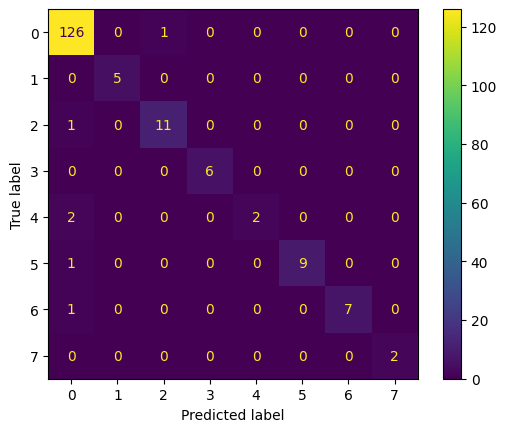

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_res = confusion_matrix(classify_dataset['labels_numeric'].to_list(),lresult)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_res,)
cm_display.plot()

In [77]:
model.evaluate(tdf,classify_dataset_label_array)

6/6 [==============================] - 0s 1ms/step - loss: 0.1917 - accuracy: 0.9655


[0.19170725345611572, 0.9655172228813171]

In [78]:
model.save('models/unitable-model/unitable-classifier-v2-yeszero.keras')

In [79]:
conveter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = conveter.convert()

# Save the model.
with open('models/unitable-model/unitable-classifier-v2-yeszero.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpokgkv6g_/assets


INFO:tensorflow:Assets written to: /tmp/tmpokgkv6g_/assets
2023-12-14 16:56:05.010241: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-12-14 16:56:05.010276: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-12-14 16:56:05.012028: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpokgkv6g_
2023-12-14 16:56:05.012755: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-12-14 16:56:05.012768: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpokgkv6g_
2023-12-14 16:56:05.015112: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2023-12-14 16:56:05.015724: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-12-14 16:56:05.048768: I tensorflow/cc/saved_model/loader.cc:217] Running initializatio